# Norwegian electric economy analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

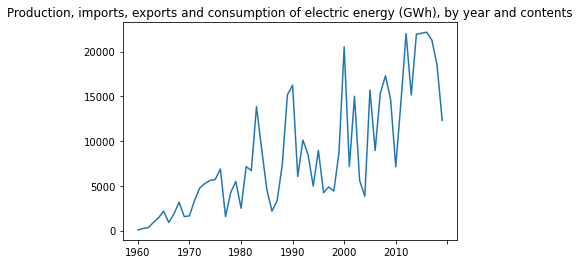

In [37]:

data = pd.read_csv('statelec.csv', sep=';')
data = data[3:].astype(int)
ax = data.plot()
ax.set_title("Production, imports, exports and consumption of electric energy (GWh), by year and contents",color='black')
plt.gca().get_legend().remove()
plt.show()



### Using these two formulas to calculate a linear regression analysis of the above plot

$$
  a = \frac{(\sum{y})(\sum{x^2})-(\sum{x})(\sum{xy})}{n(\sum{x^2})-(\sum{x})^2}
$$

$$
  b = \frac{n(\sum{xy})-(\sum{x})(\sum{y})}{n(\sum{x^2})-(\sum{x})^2}
$$

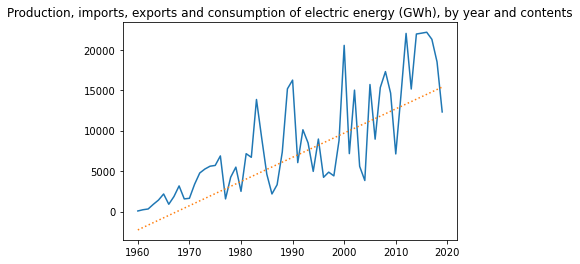

In [31]:
datarray_y = np.array(data)
datarray_y = datarray_y.flatten()
datarray_x = np.array(list(range(1960, 2020)))
start = 1960
sumtot = 0
while start < 2020:
    sumtot += start
    start += 1
years = list(range(1960, 2020))
years = np.array(years)
arr_y = data["08307: Production, imports, exports and consumption of electric energy (GWh), by year and contents"].to_numpy()
n = len(datarray_x)
sumxy = sum(arr_y * datarray_x)
sumx2 = sum(datarray_x **2)
sumy2 = sum(arr_y **2)
sumx = sum(datarray_x)
sumy = sum(arr_y)

a = (sumy * sumx2 - sumx * sumxy) / (n * sumx2 - sumx**2)
b = (n * sumxy - sumx * sumy) / (n * sumx2 - sumx**2)
inta = int(a)
intb = int(b)

#y = a + bx
funx = inta + intb * datarray_x
plt.plot(datarray_x, datarray_y)
plt.plot(datarray_x, funx, ':')
plt.title("Production, imports, exports and consumption of electric energy (GWh), by year and contents",color='black')
plt.show()


###### Plot of norwegian electric export since 1960 until current year. (Electricity produced in Norway which crosses the boarder)

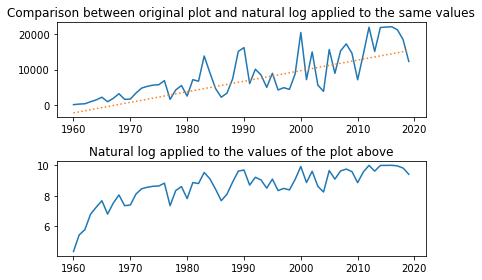

In [32]:
lnarray = np.log(datarray_y)
fig, ax = plt.subplots(2)
ax[0].plot(datarray_x, datarray_y)
ax[0].plot(datarray_x, funx, ':')
ax[0].set_title('Comparison between original plot and natural log applied to the same values')
ax[1].plot(datarray_x, lnarray)
ax[1].set_title('Natural log applied to the values of the plot above')
#plt.plot(x1, lny)
plt.tight_layout()
plt.show()

###### At first there is an appearance of general high growth, but taking natural log of each value reveals only slight growth in the last 40 years

## Electric price per year (øre)

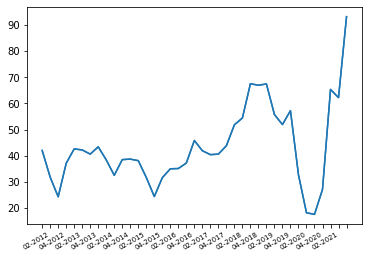

In [33]:
df = pd.read_csv('elec2.csv', skiprows=1, sep=';')

df['year'] = df['quarter'].str.slice(0, 4).astype('int')
df['quarter'] = df['quarter'].str.slice(-1).astype('int')
df['date'] = df['quarter'].map(str)+ '-' +df['year'].map(str)
df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y')
fig, ax = plt.subplots()
plt.plot(df['date'], df['Electricity price incl. taxes (�re/kWh)'])
ax.plot_date(df['date'], df['Electricity price incl. taxes (�re/kWh)'], marker='', linestyle='-', color = 'tab:blue')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.show()

###### Quarterly numbers for price of electricity from 2012 until current year. Measured in Norwegian øre/kWh.

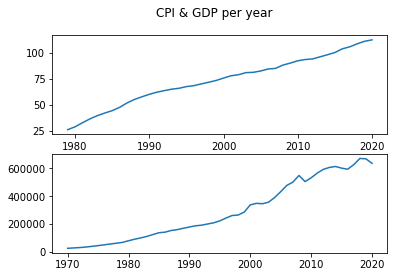

In [34]:
df1 = pd.read_csv('GDP.csv', skiprows=1, sep= ';')
df2 = pd.read_csv('inflasjon.csv', skiprows=1,sep=';')

fig, axs = plt.subplots(2)
fig.suptitle('CPI & GDP per year')
axs[1].plot(df1['year'], df1['Gross domestic product'])
axs[0].plot(df2['year'], df2['Consumer Price Index (2015=100)'])
plt.show()

###### Consumer price index used to measure economic inflation & Gross domestic product used to measure economy size and growth

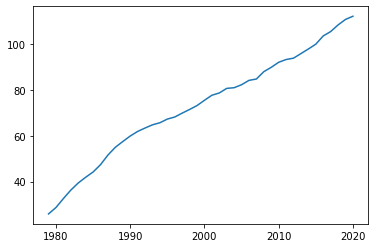

In [35]:
plt.plot(df2['year'], df2['Consumer Price Index (2015=100)'])
plt.show()

## Using the formentioned CPI to adjust the price of electricity

#### Using this formula to plot the inflation adjusted electricity price

$$
  \frac{Actual\:value}{Index\:value}\cdot {100}= Inflation\:adjusted\:value
$$

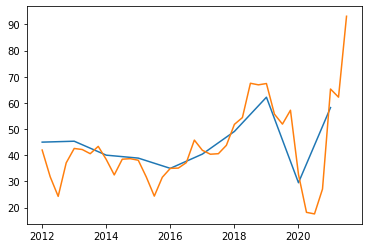

In [36]:
array_y_cpi = np.array(df2['Consumer Price Index (2015=100)'])
array_y_cpi = array_y_cpi[32:]

array_y_price = np.array(df['Electricity price incl. taxes (�re/kWh)'])
array_x = np.array(df2['year'])
array_x = array_x[33:]
array_x = np.append(array_x, [2021])
array_pros = np.array([])
for i in array_x:
    arr = np.array([i, i+0.25, i+0.5, i+0.75])
    array_pros = np.append(array_pros, arr)   
adjusted_array = (array_y_price[::4] / array_y_cpi) * 100
array_pros = array_pros[:-1]
plt.plot(array_x, adjusted_array)
plt.plot(array_pros, array_y_price)
plt.show()

##### The inflation adjusted plot reveals minimal growth in actual price from 2012 until end of 2021